<a href="https://colab.research.google.com/github/Eswa2020/data-prep-project/blob/master/Esther_wairimu_kamau_week_6_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

###  a)Specifying the Question


**Problem statement:**
You have been recruited as a football data analyst in a company -    **Mchezopesa Ltd **and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

**Input**: Home team, Away team, Tournament type (World cup, Friendly, Other)


**Background Information:**

Since their introduction in 1992, the FIFA World Rankings have been the subject of much debate, particularly regarding the calculation procedure and the resulting disparity between generally perceived quality and world ranking of some teams. The perceived flaws in the FIFA system have led to the creation of a number of alternative rankings from football statisticians.

The initial system was very simple, with no weighting for the quality of opponent or importance of a match. The rankings were adapted in 1999 to include weightings based on the importance of the match and the strength of the opponent. A win over a weak opponent resulted in fewer points being awarded than a win over a much stronger one. Further adaptations in 2006 were made to reduce the number of years' results considered from 8 to 4, with greater reliance on matches from within the previous 12 months.

Still, criticisms of the rankings remained, with particular anomalies being noted including: the United States rise to fourth in 2006, to the surprise of even their own players;**Israel's climb to 15th in November 2008**, which surprised the Israeli press and Belgium's rank of world number 1 in November 2015, given that Belgium had only played in one tournament final stage in the past 13 years.



In the 2010s, teams realized the ranking system could be 'gamed', specifically by avoiding playing non-competitive matches, particularly against weaker opponents.This was because the low weighting of friendlies meant that even victories could reduce a team's average score: in other words, a team could win a match and lose points. Prior to the seeding of the 2018 World Cup preliminary draw, 








The  model will be considered succesful if the models that will be used to predict the results of a match are:
### b) Defining the Metric for Success
**Approach 1**: Polynomial approach


What to train given:

*   **Rank of home team**
*   **Rank of away team**


Tournament type
* Model 1: Predict how many goals the home team scores.

* Model 2: Predict how many goals the away team scores.

**Approach 2**: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)


### c) Understanding the context 

After a long period testing and analysing the best way to calculate the FIFA/Coca-Cola World Ranking, a new model took effect in August 2018 after approval by the FIFA Council.

This new version developed by FIFA was named "SUM" as it relies on adding/subtracting points won or lost for a game to/from the previous point totals rather than averaging game points over a given time period as in the previous version of the World Ranking.

The points which are added or subtracted are partially determined by the relative strength of the two opponents, including the logical expectation that teams higher in the ranking should fare better against teams lower in the ranking.
Dataset Columns

* Rank
* Country Abbreviation
* Total Points
* Previous Points
* Rank Change
* Average Previous Years Points
* Average Previous Years Points Weighted (50%)
* Average 2 Years Ago Points
* Average 2 Years Ago Points Weighted (30%)
* Average 3 Years Ago Points
* Average 3 Years Ago Points Weighted (20%)
* Confederation
* Date - date of the match
* Home_team - the name of the home team
* Away_team - the name of the away team
* Home_score - full-time home team score including extra time, not including penalty-shootouts
* Away_score - full-time away team score including extra time, not including penalty-shootouts
* Tournament - the name of the tournament
* City - the name of the city/town/administrative unit where the match was played
* Country - the name of the country where the match was played
* Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

###  d)Data Relevance

there were two datasets provided:

FIFA rankings from 1993 to 2018.
I used this to get the FIFA ranking and points for the teams, which proves to a decent predictor of team performance

International Soccer matches from 1872 to 2018.
This I will use to find out how much the difference in point, ranks and the current rank of the team affects the outcome of a match

## 2. Reading the Data

In [ ]:
# Loading the results Dataset and importing the relavant libraries
#importing our libraries 

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# loading the results dataset
results_df = pd.read_csv("/content/results.csv")
# loading other dataset
fifa_ranking_df = pd.read_csv('/content/fifa_ranking.csv')

In [ ]:
print(results_df.shape)

(40839, 9)


In [ ]:
print(fifa_ranking_df.shape)

(57793, 16)


## 3. Checking and manipulating the Data

In [ ]:
# Previewing the top of the dataset
#
print(results_df.head(3))
print(fifa_ranking_df.head(3))

         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False

[3 rows x 9 columns]
   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08

[3 rows x 16 columns]


In [ ]:
# Previewing the bottom of the datasets
# 
print(results_df.tail(3))
print(fifa_ranking_df.tail(3))

             date         home_team    away_team  ...       city  country neutral
40836  2019-07-19           Senegal      Algeria  ...      Cairo    Egypt    True
40837  2019-07-19        Tajikistan  North Korea  ...  Ahmedabad    India    True
40838  2019-07-20  Papua New Guinea         Fiji  ...       Apia    Samoa    True

[3 rows x 9 columns]
       rank country_full  ... confederation   rank_date
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[3 rows x 16 columns]


In [ ]:
# Checking whether each column has an appropriate datatype
# 
print(results_df.info())
print(fifa_ranking_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int6

In [ ]:
#both datasets datetime datatypes are objects we change them to date time format

In [ ]:
# convert date from object to date type
fifa_ranking_df['rank_date'] = pd.to_datetime(fifa_ranking_df['rank_date'])
print(fifa_ranking_df.head())

   rank country_full  ... confederation  rank_date
0     1      Germany  ...          UEFA 1993-08-08
1     2        Italy  ...          UEFA 1993-08-08
2     3  Switzerland  ...          UEFA 1993-08-08
3     4       Sweden  ...          UEFA 1993-08-08
4     5    Argentina  ...      CONMEBOL 1993-08-08

[5 rows x 16 columns]


In [ ]:
# convert date from object to date type
results_df['date'] = pd.to_datetime(results_df['date'])
print(results_df.head())

        date home_team away_team  ...     city   country neutral
0 1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1 1873-03-08   England  Scotland  ...   London   England   False
2 1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3 1875-03-06   England  Scotland  ...   London   England   False
4 1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]


In [ ]:
#renaming the common columns in our datasets
#since we have to merge the datasets we change the names of the common columns
#the common columns are 'country' and 'date'
#
fifa_ranking_df.rename(columns={'country_full': 'country','rank_date':'date'},inplace = True)
fifa_ranking_df.columns


Index(['rank', 'country', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date'],
      dtype='object')

In [ ]:
#we choose columns that we only want to choose depending on our problem statement
fifa_ranking_df = fifa_ranking_df.loc[:,['rank', 'country', 'country_abrv', 'cur_year_avg_weighted','last_year_avg_weighted','date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]

In [ ]:
print(fifa_ranking_df.head())

   rank      country  ... two_year_ago_weighted  three_year_ago_weighted
0     1      Germany  ...                   0.0                      0.0
1     2        Italy  ...                   0.0                      0.0
2     3  Switzerland  ...                   0.0                      0.0
3     4       Sweden  ...                   0.0                      0.0
4     5    Argentina  ...                   0.0                      0.0

[5 rows x 8 columns]


So we can see that each row of the results dataset is composed of :
A date, the two teams and their score, the tournament, the location : country and city and, if the location is neutral



In [ ]:
#we can only get goals by subtracting the 'away goals' from the 'home goals'
# When answer is '0' it is a Draw(when home goal and away goal are equal)
# When answer is '>1' it is a Win(when  home goal is greater than away goal)
# When answer is  '<1' it is a lose(when  home goal is less than away goal)
# to get this we code the following
#Creating a column on status of the game results: Win, lose and draw
results_df['goals'] = ['Draw' if i == 0  else 'Win' if i > 1  else 'lose' for i in results_df['home_score'] - results_df['away_score']]
results_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,lose
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win
...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,Win
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,Draw
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,lose
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,lose


In [ ]:
#renaming the common columns in our datasets
#since we have to merge the datasets we change the names of the common columns
#the common columns are 'country' and 'date'
#and we can merge on the home team and the away team as  it is one of the ways we solve the problem
#we start by creating home rank and away rank

In [ ]:
#  merge the home team to get the home country ranks
rank_home = pd.merge(results_df, fifa_ranking_df, left_on= ['date', 'home_team'], 
                     right_on= ['date', 'country'], how = 'inner')
#after merging we rename our 'rank column to home_rank

rank_home.rename(columns={'rank':'homerank'}, inplace=True)

print(rank_home.head())


        date home_team  ... two_year_ago_weighted  three_year_ago_weighted
0 1993-08-08   Bolivia  ...                   0.0                      0.0
1 1993-08-08    Brazil  ...                   0.0                      0.0
2 1993-08-08   Ecuador  ...                   0.0                      0.0
3 1993-08-08    Guinea  ...                   0.0                      0.0
4 1993-08-08  Paraguay  ...                   0.0                      0.0

[5 rows x 17 columns]


In [ ]:
rank_home.shape

(957, 20)

In [ ]:
# Create new columns
results_df['day'] = results_df['date'].dt.day
results_df['month'] = results_df['date'].dt.month
results_df['year'] = results_df['date'].dt.year

In [ ]:
# Create new columns
fifa_ranking_df['day'] = fifa_ranking_df['date'].dt.day
fifa_ranking_df['month'] =fifa_ranking_df['date'].dt.month
fifa_ranking_df['year'] = fifa_ranking_df['date'].dt.year

In [ ]:
#  merge the home team to get the home country ranks
rank_home = pd.merge(results_df, fifa_ranking_df, left_on= ['year','month','home_team'], 
                     right_on= ['year','month', 'country'], how = 'inner')
#after merging we rename our 'rank column to home_rank

rank_home.rename(columns={'rank':'homerank'}, inplace=True)

print(rank_home.head())

      date_x home_team  ... three_year_ago_weighted  day_y
0 1993-08-01  Colombia  ...                     0.0      8
1 1993-08-15  Colombia  ...                     0.0      8
2 1993-08-29  Colombia  ...                     0.0      8
3 1993-08-01      Peru  ...                     0.0      8
4 1993-08-08      Peru  ...                     0.0      8

[5 rows x 22 columns]


In [ ]:
rank_home.shape

(18609, 22)

In [ ]:
rank_home.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country_x', 'neutral', 'goals', 'day_x', 'month',
       'year', 'homerank', 'country_y', 'country_abrv',
       'cur_year_avg_weighted', 'last_year_avg_weighted', 'date_y',
       'two_year_ago_weighted', 'three_year_ago_weighted', 'day_y'],
      dtype='object')

In [ ]:
#we take columns we need in rank_home
#we choose columns that we only want to choose depending on our problem statement
fifa_ranking_df = fifa_ranking_df.loc[:,['home_team', 'away_team', 'home_score', 'cur_year_avg_weighted','last_year_avg_weighted','date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]

In [ ]:
#  merge the away team to get the away country ranks
rank_away = pd.merge(results_df, fifa_ranking_df, left_on=['away_team', 'date'],
                     right_on= ['country', 'date'], how = 'inner')
#after merging we rename our 'rank column to away rank
rank_away.rename(columns={'rank' : 'awayrank'}, inplace=True)

print(rank_away.head())

        date home_team  ... two_year_ago_weighted  three_year_ago_weighted
0 1993-08-08   Bolivia  ...                   0.0                      0.0
1 1993-08-08    Brazil  ...                   0.0                      0.0
2 1993-08-08   Ecuador  ...                   0.0                      0.0
3 1993-08-08    Guinea  ...                   0.0                      0.0
4 1993-08-08  Paraguay  ...                   0.0                      0.0

[5 rows x 17 columns]


In [ ]:
# obtaining the columns that I will merge with the home team table

final_rank_away = rank_away[['date','home_team', 'away_team', 'awayrank']]


In [ ]:
 # Finally we Merge homerank dataframe and  awayrank dataframe

finalrank = pd.merge(rank_home, final_rank_away, left_on = ['home_team', 'away_team', 'date'],
                 right_on = ['home_team', 'away_team', 'date'], how = 'inner')


In [ ]:
finalrank.isna().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country_x                  0
neutral                    0
goals                      0
homerank                   0
country_y                  0
country_abrv               0
cur_year_avg_weighted      0
last_year_avg_weighted     0
two_year_ago_weighted      0
three_year_ago_weighted    0
awayrank                   0
dtype: int64

In [ ]:
print(finalrank.shape)

(871, 18)


###### since most of the methods are resulting in merged datasets that are either too small but we have to  go further and divide our dates into months and years and check if they join fine and also dealing with any Missing Data emanating from merging the data

In [ ]:
# Reset our index so datetime_utc becomes a column
finalrank.reset_index(inplace=True)

In [ ]:
# Create new columns
rank_home['day'] = rank_home['date'].dt.day
rank_home['month'] = rank_home['date'].dt.month
rank_home['year'] = rank_home['date'].dt.year

In [ ]:
rank_away['day'] = rank_away['date'].dt.day
rank_away['month'] = rank_away['date'].dt.month
rank_away['year'] = rank_away['date'].dt.year

In [ ]:
final_rank_away2=[['year','month','home_team', 'away_team', 'awayrank']]

In [ ]:
finalrank2=pd.merge(rank_home,rank_away, left_on = ['home_team', 'away_team', 'month','year'],
                 right_on = ['home_team', 'away_team', 'month','year'], how = 'inner')

In [ ]:
# we then drop unnecessary columns in the final results data set

finalrank = finalrank.drop(columns=['country_y', 'country_abrv', 'country_x',])

In [ ]:
finalrank2.shape

(871, 36)

In [ ]:
# checking for missing values
finalrank.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country_x                  0
neutral                    0
goals                      0
homerank                   0
country_y                  0
country_abrv               0
cur_year_avg_weighted      0
last_year_avg_weighted     0
two_year_ago_weighted      0
three_year_ago_weighted    0
awayrank                   0
day                        0
month                      0
year                       0
dtype: int64

In [ ]:
# checking for duplicates in our dataset
finalrank.duplicated().any()

False

## 6. Exploratory Analysis
#### a)Univariate Analysis

In [ ]:
# We first check stastics of each numeric variable and how far they are from the mean

finalrank.describe()

,home_score,away_score,homerank,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_weighted,three_year_ago_weighted,awayrank
count,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000,871.000000
mean,1.632606,1.004592,65.549943,19.919989,9.316820,5.700482,3.605901,69.918485
std,1.905960,1.154691,47.557993,84.468506,42.911114,24.565459,15.481310,50.497652
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,28.000000
50%,1.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,61.000000
75%,2.000000,2.000000,95.000000,0.000000,0.000000,0.000000,0.000000,102.500000
max,31.000000,9.000000,206.000000,788.680000,504.470000,224.580000,128.000000,209.000000


Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

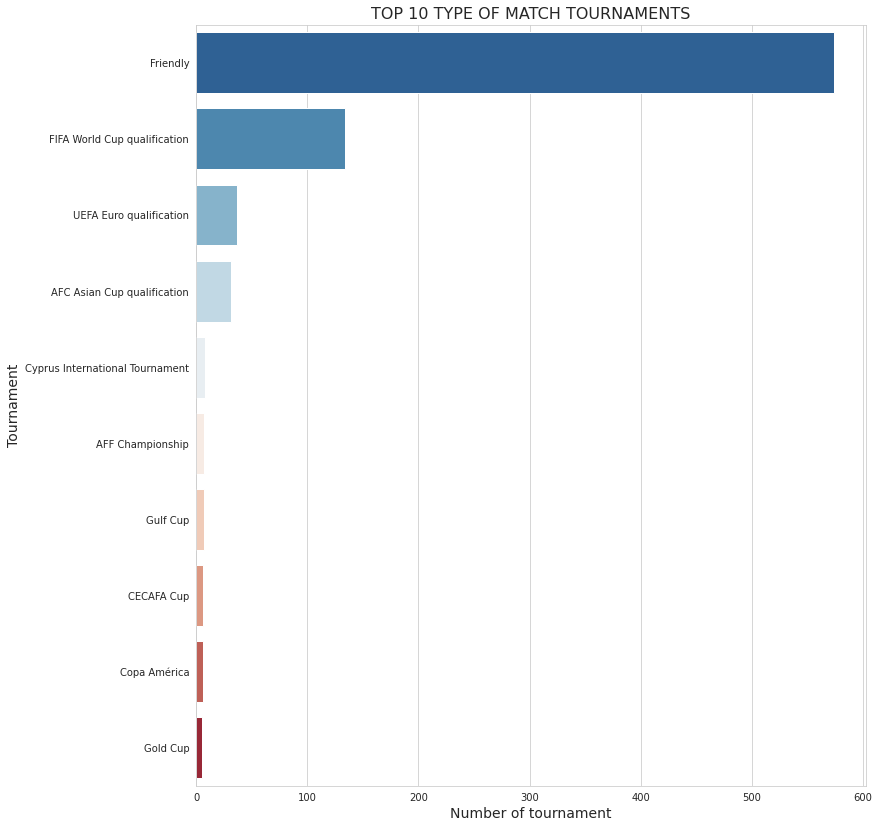

In [ ]:
# which grooup tournamets so that we get the values_counts and plot it to see how
#visually distributed (spread ) it is
tournament = finalrank['tournament'].value_counts()
tournament = tournament[:10]
#plotting the variable
plt.figure(figsize = (12,14))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="RdBu_r", orient='h')
ax.set_ylabel('Tournament', size=14)
ax.set_xlabel('Number of tournament', size=14)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=16)


In [ ]:
# which grooup tournamets so that we get the values_counts and plot it to see how
#visually distributed (spread ) it is
tournament = finalrank['tournament'].value_counts()
tournament = tournament[:10]
#plotting the variable
plt.figure(figsize = (12,14))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="RdBu_r", orient='h')
ax.set_ylabel('Tournament', size=14)
ax.set_xlabel('Number of tournament', size=14)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=16)

In [ ]:
# the teams that scored the most
plt.figure(figsize = (17, 14))
plt_data = finalrank.home_team.sort_values(by='finalrank.goals', ascending=False)[:10]
sns.set_style("whitegrid")
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

NameError: ignored

Text(0.5, 1.0, 'TOP 10 OF NUMBER OF MATCHES')

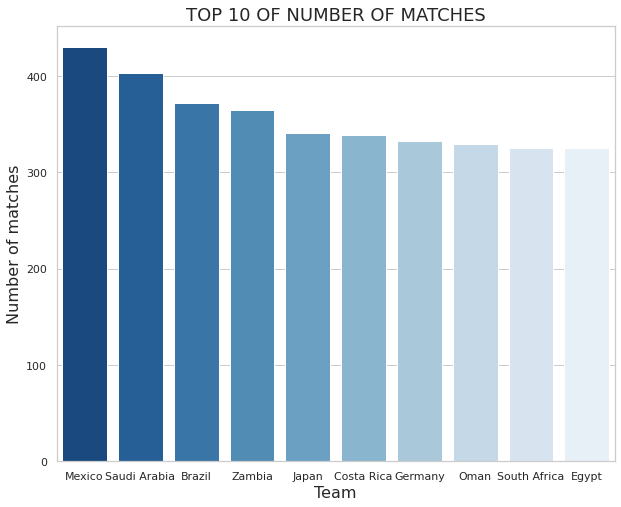

In [ ]:
# the top 10 teams who played the most matches
plt.figure(figsize = (10,8))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_matches', ascending=False)[:10]
ax = sns.barplot(x="home_team", y="nb_matches", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of matches', size=16)
ax.set_title("TOP 10 OF NUMBER OF MATCHES", fontsize=18)

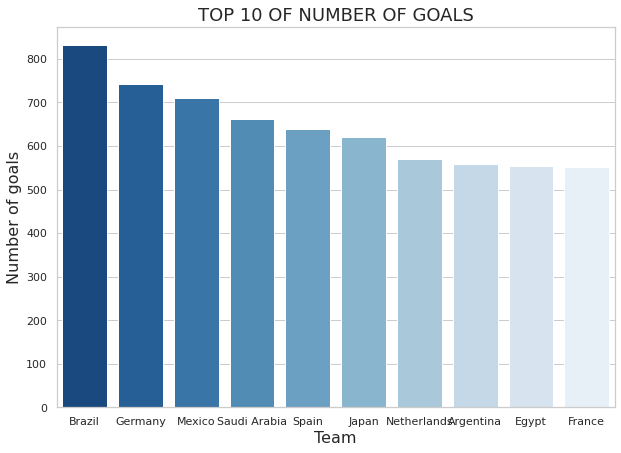

In [ ]:
# the top ten teams who scored the most goals
plt.figure(figsize = (10,7))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [ ]:
# finding the average score based on home and away
means = finalrank[['home_score','away_score']].mean()
means

home_score    1.632606
away_score    1.004592
dtype: float64

we can notice that, on average, the home team scored more goals than the away team

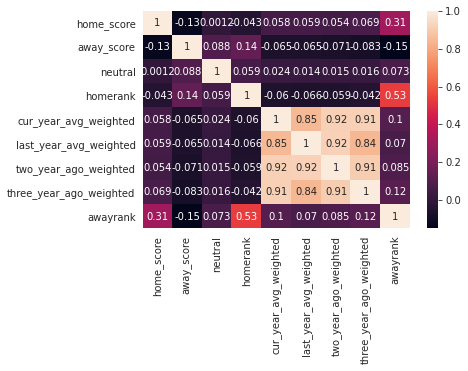

In [ ]:
# Checking the pearson correlation coefficient 

sns.heatmap(finalrank.corr(),annot=True)
plt.show()

## 7. Feature Engineering

Firstly, I'll join the matches with the ranks of the different teams.

Then extract some features:
- score and rank differences


**Modelling using logistic regression**

**Modelling using Polynomial approach**

## 8. Challenging the solution

## 9. Follow up questions

### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?